In [1]:
import sys
sys.path.append("../")

In [2]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [8]:
import torch
from sbi import utils as utils
from sbi.inference.snre.snre_a import SNRE_A

In [10]:
num_dim = 3
prior = utils.BoxUniform(low=-2*torch.ones(num_dim), high=2*torch.ones(num_dim))

def simulator(parameter_set):
    return 1.0 + parameter_set + torch.randn(parameter_set.shape) * 0.1


In [67]:
thetas = prior.sample((10000,))
x = ([simulator(theta).numpy() for theta in thetas])
x = torch.Tensor(x)

In [68]:
snre = SNRE_A(prior, classifier='resnet', show_progress_bars=True)

In [69]:
snre.append_simulations(thetas, x)

In [70]:
snre.train(thetas, x)

 Training neural network. Epochs trained:  50Neural network successfully converged after 50 epochs.


Sequential(
  (0): StandardizeInputs(
    (embedding_net_x): Sequential(
      (0): Standardize()
      (1): Identity()
    )
    (embedding_net_y): Sequential(
      (0): Standardize()
      (1): Identity()
    )
  )
  (1): ResidualNet(
    (initial_layer): Linear(in_features=6, out_features=50, bias=True)
    (blocks): ModuleList(
      (0): ResidualBlock(
        (linear_layers): ModuleList(
          (0): Linear(in_features=50, out_features=50, bias=True)
          (1): Linear(in_features=50, out_features=50, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1): ResidualBlock(
        (linear_layers): ModuleList(
          (0): Linear(in_features=50, out_features=50, bias=True)
          (1): Linear(in_features=50, out_features=50, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
    (final_layer): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [97]:
posterior = snre.build_posterior(mcmc_method="nuts")

In [98]:
theta_test = prior.sample((1,))
x_o = simulator(theta_test)

In [99]:
posterior_samples = posterior.sample((1000,), x=x_o)

Sample: 100%|██████████| 10021/10021 [01:15, 133.02it/s, step size=2.65e-01, acc. prob=0.727]


In [100]:
import corner

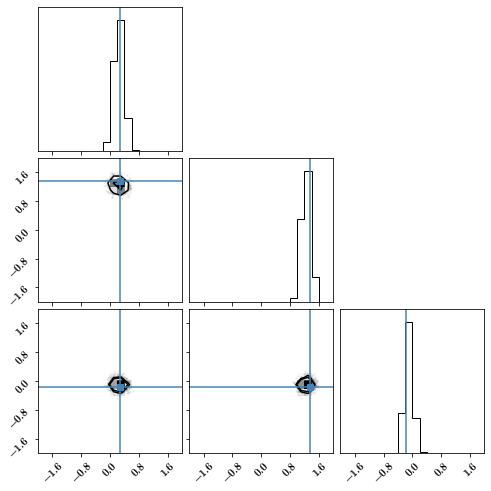

In [102]:
corner.corner(posterior_samples, truths=theta_test[0], range=[[-2,2],[-2,2],[-2,2]],);